# Project Background:

#### Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

#### Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

#### IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

<img src="giphy.gif">

# Objective 1: Filter Resume based on Job Description

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

from nltk import bigrams
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khchu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khchu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khchu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read Dataset to DataFrame

In [2]:
df_resume = pd.read_csv('resume_dataset.csv')
jd_df = pd.read_csv('jd_data.csv', encoding='cp1252')
jd_df.rename(columns = {'JD':'Resume'}, inplace=True)

## Merge JD and Resume dataset

In [3]:
df_resume = pd.concat([df_resume, jd_df], ignore_index=True)

## Exploratory Data Visualization

### Dataset Size

In [4]:
df_resume

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
967,Business Analyst,Work with business stakeholders to deliver cus...
968,Data Science,ring your career aspirations to life with AIA!...
969,Data Science,Develop cutting edge differentiated capabiliti...
970,DevOps Engineer,Building and setting up new development tools ...


In [5]:
df_resume.shape

(972, 2)

In [6]:
df_resume.sample(5)

,Category,Resume
177,Web Designing,"Technical Skills Web Technologies: Angular JS,..."
640,DevOps Engineer,Software Proficiency: â¢ Languages: Basics of...
531,Operations Manager,Education Details \r\n BCA Vinayaka Missions...
503,Electrical Engineering,â¢ Achievement oriented with people managemen...
907,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...


### Distribution of Job Categories

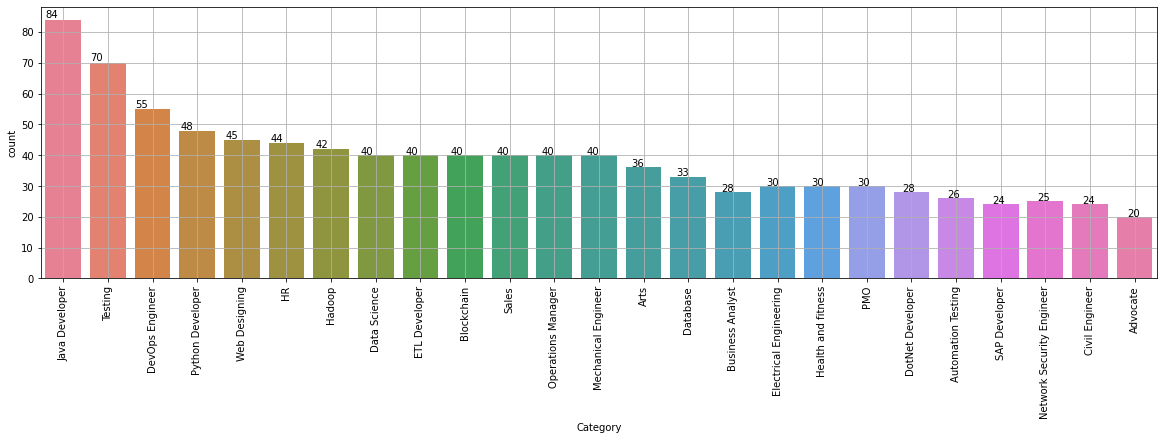

In [7]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df_resume[:962], order=df_resume['Category'].value_counts().index, palette="husl")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

## Data Cleaning

### Removed Unusual Characters using Regular Expression (Regex)

In [8]:
def unusual_text_remover(text):
    text = re.sub('â\x80¢Â', ' ', text)
    text = re.sub('â\x9c¶', ' ', text)
    text = re.sub('Ã¼Â', ' ', text)
    text = re.sub('Â', '', text)
    text = re.sub('Ã¼', '', text)
    text = re.sub('ï', '', text)
    text = (re.sub('[\W]+', ' ', text.lower()))
    return text

In [9]:
usual_text = df_resume['Resume'].apply(unusual_text_remover)

In [10]:
df_resume['Processed_Resume'] = df_resume['Resume'].apply(unusual_text_remover)

## Data Preprocessing

### Convert root word using Lemmatization

In [11]:
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    word_list = word_tokenize(text)
    output = ' '.join([lemmatizer.lemmatize(word) for word in word_list])
    return output

In [12]:
lemmatized_text = usual_text.apply(lemmatization)

In [13]:
df_resume['Processed_Resume'] = df_resume['Processed_Resume'].apply(lemmatization)

### Resume before data cleaning and preprocessing (in-progress)

In [14]:
df_resume.iloc[18,1]

'Personal Skills â\x9e¢ Ability to quickly grasp technical aspects and willingness to learn â\x9e¢ High energy levels & Result oriented. Education Details \r\nJanuary 2018 Master of Engineering Computer Technology & Application Bhopal, Madhya Pradesh Truba Institute of Engineering & Information Technology\r\nJanuary 2010 B.E. computer science Bhopal, Madhya Pradesh RKDF Institute of Science and Technology College of Engineering\r\nJanuary 2006 Polytechnic Information Technology Vidisha, Madhya Pradesh SATI Engineering College in Vidisha\r\nJanuary 2003 M.tech Thesis Detail  BMCH School in Ganj basoda\r\nData science \r\n\r\nI have six month experience in Data Science. Key Skills: - Experience in Machine Learning, Deep Leaning, NLP, Python, SQL, Web Scraping Good knowledge in computer subjects and ability to update\r\nSkill Details \r\nExperience in Machine Learning, Deep Learning, NLP, Python, SQL, Web Crawling, HTML,CSS.- Exprience - Less than 1 year monthsCompany Details \r\ncompany 

### Resume after data cleaning 

In [15]:
usual_text[18]

'personal skills â ability to quickly grasp technical aspects and willingness to learn â high energy levels result oriented education details january 2018 master of engineering computer technology application bhopal madhya pradesh truba institute of engineering information technology january 2010 b e computer science bhopal madhya pradesh rkdf institute of science and technology college of engineering january 2006 polytechnic information technology vidisha madhya pradesh sati engineering college in vidisha january 2003 m tech thesis detail bmch school in ganj basoda data science i have six month experience in data science key skills experience in machine learning deep leaning nlp python sql web scraping good knowledge in computer subjects and ability to update skill details experience in machine learning deep learning nlp python sql web crawling html css exprience less than 1 year monthscompany details company rnt ai technology solution description text classification using machine lea

### Resume after data cleaning and preprocessing (in-progress)

In [16]:
lemmatized_text[18]

'personal skill â ability to quickly grasp technical aspect and willingness to learn â high energy level result oriented education detail january 2018 master of engineering computer technology application bhopal madhya pradesh truba institute of engineering information technology january 2010 b e computer science bhopal madhya pradesh rkdf institute of science and technology college of engineering january 2006 polytechnic information technology vidisha madhya pradesh sati engineering college in vidisha january 2003 m tech thesis detail bmch school in ganj basoda data science i have six month experience in data science key skill experience in machine learning deep leaning nlp python sql web scraping good knowledge in computer subject and ability to update skill detail experience in machine learning deep learning nlp python sql web crawling html cs exprience le than 1 year monthscompany detail company rnt ai technology solution description text classification using machine learning algor

## Filter Resume based on keywords and Job Title

In [17]:
df_filtered = pd.DataFrame()  

key_words = ['12 month', '1 year', 'python']
role = 'Data Science'

for idx in range(df_resume.shape[0]):
    sentence = df_resume['Processed_Resume'][idx]  
    twogram = bigrams(sentence.split())
    for gram in twogram:
        try:
            if (gram[0] + ' ' + gram[1]) in key_words and df_resume.iloc[[idx]]['Category'].values[0] == role:
                    df_filtered =  df_filtered.append(df_resume.iloc[[idx]])
        
        except KeyError:
            df_filtered =  df_filtered.append(df_resume.iloc[[idx]])
             
df_filtered.drop_duplicates(subset=['Processed_Resume'], inplace=True)
      

In [18]:
df_filtered

,Category,Resume,Processed_Resume
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 to may 2017 b e uit ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area of interest deep learning control system ...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill â r â python â sap hana â tableau â sap ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",skill c basic iot python matlab data science m...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skill â python â tableau â data visualization ...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,education detail b tech rayat and bahra instit...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,personal skill â ability to quickly grasp tech...


### Write Dataframe to csv file

In [19]:
df_filtered.to_csv('filtered_resume.csv')

# Objective 2: Classify Job Category from Incoming Resume

In [20]:
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

from wordcloud import WordCloud

## Data Preprocessing 

### Remove Stop-words in Resume

In [21]:
stop = stopwords.words('english')

In [22]:
total_words =[]
sentences = []
for text in df_resume['Processed_Resume']:
    word_list = word_tokenize(text)
    para = [word for word in word_list if word not in stop]
    sentences.append(' '.join(para))
    total_words = total_words + para


In [23]:
len(sentences)

972

In [24]:
wordfreqdist = nltk.FreqDist(' '.join(total_words))
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[(' ', 335290), ('e', 247613), ('i', 174249), ('n', 166935), ('a', 166307), ('t', 165649), ('r', 146028), ('o', 137230), ('s', 109830), ('c', 101925), ('l', 97688), ('p', 81033), ('d', 73876), ('m', 70332), ('u', 57355), ('g', 56464), ('h', 35846), ('y', 35019), ('v', 29555), ('b', 25652), ('f', 22662), ('k', 17352), ('w', 17212), ('â', 14935), ('j', 11062), ('x', 10040), ('q', 7408), ('1', 7302), ('0', 7025), ('2', 6646), ('6', 2601), ('z', 2490), ('3', 1926), ('4', 1826), ('5', 1580), ('8', 1412), ('7', 1361), ('9', 1021), ('ã', 774), ('ª', 108), ('_', 17)]


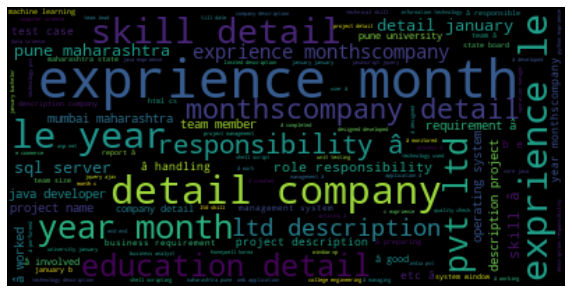

In [25]:
wc = WordCloud().generate(' '.join(total_words))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()      

### Transform words into feature vectors

In [26]:
count = CountVectorizer()

In [27]:
tfidf = TfidfTransformer(use_idf=True, norm = 'l2', smooth_idf =True)

In [28]:
tfidf.fit_transform(count.fit_transform(sentences))

<972x6770 sparse matrix of type '<class 'numpy.float64'>'
	with 163296 stored elements in Compressed Sparse Row format>

In [29]:
np.set_printoptions(precision= 2)
a = tfidf.fit_transform(count.fit_transform(sentences)).toarray()

### Train the model

In [30]:
y = df_resume['Category'][:962]
x = a[:962]
x_test_jd = a[962:]
y_test_jd = df_resume['Category'][962:]

In [31]:
print(y.shape)
print(x.shape)
print(y_test_jd.shape)

(962,)
(962, 6770)
(10,)


In [32]:
X_train,X_test,y_train,y_test = train_test_split(x, y,random_state=42, test_size=0.3,
                                                 shuffle=True, stratify=y)

In [33]:
# Create object clf from class OneVsRestClassifier and KNeighborsClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())
# Input training sets into the object (model)
clf.fit(X_train, y_train)
# Predict target variable by using test set on the trained model
prediction = clf.predict(X_test)

In [34]:
print(round(clf.score(X_train, y_train),3))
print(round(clf.score(X_test, y_test),3))

0.987
0.976


In [35]:
print(f'{clf} \n')
print(metrics.classification_report(y_test, prediction))

OneVsRestClassifier(estimator=KNeighborsClassifier()) 

                           precision    recall  f1-score   support

                 Advocate       1.00      0.83      0.91         6
                     Arts       1.00      1.00      1.00        11
       Automation Testing       0.88      0.88      0.88         8
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       1.00      1.00      1.00         8
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       0.83      0.83      0.83        12
                 Database       1.00      1.00      1.00        10
          DevOps Engineer       1.00      0.94      0.97        17
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.00        12
   Electrical Engineering       0.90      1.00      0.95         9
                       HR       0.93      1.00      0.96        13
     

# Objective 3: Run JD data on trained model

In [39]:
jd_prediction = clf.predict(x_test_jd)
print(jd_prediction)
print(y_test_jd)

['SAP Developer' 'Data Science' 'Automation Testing' 'Python Developer'
 'Operations Manager' 'DotNet Developer' 'Data Science' 'Data Science'
 'DevOps Engineer' 'DevOps Engineer']
962       SAP Developer
963       SAP Developer
964      Java Developer
965      Java Developer
966    Business Analyst
967    Business Analyst
968        Data Science
969        Data Science
970     DevOps Engineer
971     DevOps Engineer
Name: Category, dtype: object


In [37]:
print(f'{clf} \n')
print(metrics.classification_report(y_test_jd, jd_prediction))

OneVsRestClassifier(estimator=KNeighborsClassifier()) 

                    precision    recall  f1-score   support

Automation Testing       0.00      0.00      0.00         0
  Business Analyst       0.00      0.00      0.00         2
      Data Science       0.67      1.00      0.80         2
   DevOps Engineer       1.00      1.00      1.00         2
  DotNet Developer       0.00      0.00      0.00         0
    Java Developer       0.00      0.00      0.00         2
Operations Manager       0.00      0.00      0.00         0
  Python Developer       0.00      0.00      0.00         0
     SAP Developer       1.00      0.50      0.67         2

          accuracy                           0.50        10
         macro avg       0.30      0.28      0.27        10
      weighted avg       0.53      0.50      0.49        10



C:\Users\khchu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khchu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khchu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khchu\anaconda3\lib\site-packages\sklearn\metrics\_cla